<a href="https://colab.research.google.com/github/erhnk/Churn-Modelling/blob/main/Veri_%C3%96n_%C4%B0%C5%9Fleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [13]:
#Cinsiyet Sütununu nümerik hale çevirelim
for k in range(0,len(data)):
 if data.Gender[k] == "Male":
    data.Gender[k] = 1 
 else:
     data.Gender[k] = 0 

In [14]:
#Geography sütununu one hot yöntemi ile nümerik hale çevirelim
data = pd.get_dummies(data, columns = ["Geography"], prefix = ["Geography"])

In [15]:
#Değişken tuzağına yakalanmamak için bir sütunu siliyoruz.
data.drop(["Geography_Spain"], axis = 1, inplace=True)

Yaş sütunu

In [16]:
#Yaş ve kredi skor sütunlarındaki aykırı değerleri baskılayalım.

In [17]:
data_Age = data["Age"]
Q1 = data_Age.quantile(0.25)
Q3 = data_Age.quantile(0.75)
IQR = Q3-Q1
ust_sinir = Q3 + 1.5*IQR

In [18]:
ust_sinir

62.0

In [19]:
aykiri_ust = (data_Age > ust_sinir)
data_Age[aykiri_ust]
data_Age[aykiri_ust] = ust_sinir

In [20]:
data_Age[aykiri_ust]

58      62
85      62
104     62
158     62
181     62
        ..
9753    62
9765    62
9832    62
9894    62
9936    62
Name: Age, Length: 359, dtype: int64

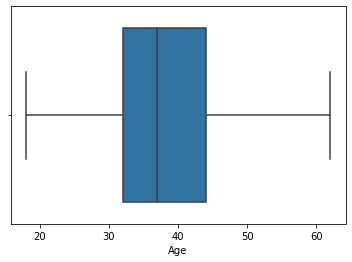

In [21]:
sns.boxplot(data["Age"])

Kredi Sütunu

In [22]:
data_CreditScore = data["CreditScore"]

In [23]:
Q1_Credit = data_CreditScore.quantile(0.25)
Q3_Credit = data_CreditScore.quantile(0.75)
IQR_Credit = Q3_Credit-Q1_Credit
alt_sinir1 = Q1_Credit- 1.5*IQR_Credit

In [24]:
alt_sinir1

383.0

In [25]:
aykiri_alt = (data_CreditScore< alt_sinir1)

In [26]:
data.CreditScore[aykiri_alt]

7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [27]:
data_CreditScore[aykiri_alt] = alt_sinir1

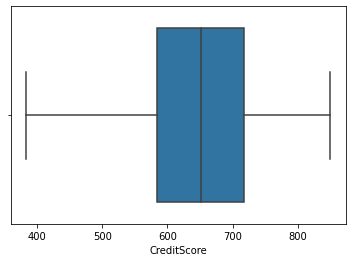

In [28]:
sns.boxplot(data["CreditScore"])

In [29]:
#Yaş sütununu kategorize edelim.

In [30]:
for i in range(0,len(data)):
   if data.Age[i] >= 0 and data.Age[i] <=30:
      data.Age[i] = "Youth"
   elif data.Age[i] > 30  and data.Age[i] <=40:
        data.Age[i] = "Adult"
   elif data.Age[i] > 40  and data.Age[i] <=50:
        data.Age[i] = "Middle Age"
   elif data.Age[i] > 50  and data.Age[i] <=55:
        data.Age[i] = "Old"
   else:
       data.Age[i] = "Very Old"   

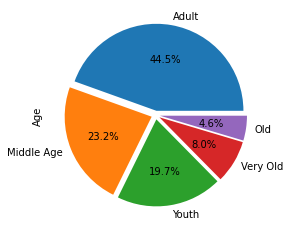

In [32]:
data["Age"].value_counts().plot.pie(explode = [0.05,0.05,0.05,0.05,0.05], autopct = '%1.1f%%');

In [ ]:
#Veri setimizin müşterilerimizin çoğunluğu yetişkindir.

In [ ]:
#Kredi sütununa eşik değere göre kategorik sütuna çevirelim.

In [33]:
for i in range(0,len(data)):
   if data.CreditScore[i] >=500  and data.CreditScore[i] <=850:
      data.CreditScore[i] = 1
   else:
       data.CreditScore[i] = 0 

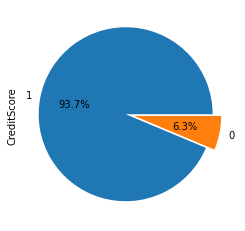

In [35]:
data["CreditScore"].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%');

In [ ]:
#Müşterilerimizin çoğunluğunun belirlediğimiz eşik değerinin üstünde olduğu görülüyor.

In [ ]:
#Yaş sütununu one hot kullanarak nümerik hale getirelim.

In [36]:
data = pd.get_dummies(data, columns = ["Age"], prefix = ["AgeGroup"])

In [39]:
#Değişken tuzağına düşmemek için yaş ile ilgili bir sütunu kaldıralım.
data.drop(["AgeGroup_Middle Age"], axis = 1, inplace=True)

In [ ]:
#RowNumber, Customerıd ve Surname sütunlarını kaldıralım.

In [41]:
data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [42]:
data.head(10)

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Very Old,AgeGroup_Youth
0,1,0,2,0.00,1,1,1,101348.88,1,1,0,0,0,0,0
1,1,0,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,0
2,1,0,8,159660.80,3,1,0,113931.57,1,1,0,0,0,0,0
3,1,0,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,0
4,1,0,2,125510.82,1,1,1,79084.10,0,0,0,0,0,0,0
5,1,1,8,113755.78,2,1,0,149756.71,1,0,0,0,0,0,0
6,1,1,7,0.00,2,1,1,10062.80,0,1,0,0,0,0,0
7,0,0,4,115046.74,4,1,0,119346.88,1,0,1,0,0,0,1
8,1,1,4,142051.07,2,0,1,74940.50,0,1,0,0,0,0,0
9,1,1,2,134603.88,1,1,1,71725.73,0,1,0,0,0,0,1


**Veri ölçeklendirme ve verinin eğitim-test verisi olarak ayrılması**

In [44]:
#Çıktı değişkeni dışındaki bağımsız değişkenleri X'e atayalım.
#Çıktı değişkenini(bağımlı değişken) y'ye atayalım.
X = data.drop(["Exited"], axis = 1)
y = data["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
#X ve y değişkenlerini kullanarak veri setimi eğiteceğimiz ve test edeceğimiz veri kümelerini oluşturduk.

In [45]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Algoritmalar farklı ölçekteki değerden kötü etkilenmemeleri için verimizi 0-1 aralığına ölçeklendiriyoruz.